# Linear regression as a simple neural network

Suppose we have a bivariate data set $x$ and $y$ and we wish to fit a linear model, $\hat{y} = wx + b$, to it. The classical approach is to use least squares regression: a model which minimises the squares of the residuals between the measured value and the predicted value.

This can also be achieved through the use of a simple neural network consisting of just an input layer of one neuron and an output layer of one neuron. There is one edge connecting them which scalar multiplies the input vector by a __weight__ $w$ and adds a __bias__ $b$ to each component of the vector.

Our __training data__ for our neural network will be a randomly generated set of $n$ scores, made to be appropximately linear.


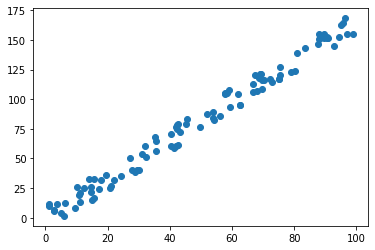

In [33]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1) # deterministic random seed
n = 100 # number of scores in our data set

x = np.random.uniform(low = 1, high = 100, size = n).reshape(n,1) # create random array for x values

w = 2 * np.random.random() + 1 # random gradient between 1 and 3
b = 10 * np.random.random() - 5 # random y-intercept between -5 and 5
s = np.random.uniform(low = -10, high = 10, size = n).reshape(n,1) # create some variation around the line

y = w * x + b + s

plt.scatter(x,y)
plt.show()

## Classical linear regression
Before we construct a neural network to find the linear model, we will use the classical linear regression model. Recall the gradient of the linear model is given by
\\[ w = \frac{\sum_{i=0}^n (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=0}^n (x_i - \bar{x})^2}. \\]
The $y$-intercept is then given by
\\[ b = \bar{y} - w \bar{x}. \\]

In [16]:
w_calc = np.sum((x - x.mean())*(y - y.mean())) / np.sum((x - x.mean())**2)
b_calc = y.mean() - w_calc * x.mean()
print("w = ", w_calc) 
print("b = ", b_calc)

w =  1.6621957496645583
b =  -0.33931172631471895


## Creating the network
We begin by setting $w$ and $b$ to zero. We then update these values through a loop which looks at the difference between the predicted values generated by $\hat{y} = wx + b$ and the training data $y$ values. Obviously, this first model will be a terrible fit. To create a better fit we use an error function and minimise the error using a technique called __gradient descent__.

Our error function of choice is the half mean squared error:
\\[ J := \frac{1}{2n} \sum_{i=1}^n (\hat{y}_i - y_i)^2. \\]
To choose the direction in which we should move we use the negative of the __gradient__:
\\[ \nabla J = \left[ \begin{array}{c} \frac{\partial J}{\partial w} \\ \frac{\partial J}{\partial b} \end{array} \right]. \\]
This is because the gradient gives us the direction in which we should travel to increase the value of a multivariable function most rapidly. The negative then gives us the direction to _decrease_ the value of a function most rapidly.

For the mean squared error function, the gradient is found by substituting the equation for $\hat{y}$:
\\[ J = \frac{1}{n} \sum_{i=1}^n (wx_i + b - y_i)^2 \\]
The gradient is then given by the partial derivatives:
\\[ \frac{\partial J}{\partial w} = \frac{2}{n} \sum_{i=1}^n x_i (w x_i + b - y_i) = \frac{2}{n} \sum_{i=1}^n x_i (\hat{y} - y_i), \\]
and
\\[ \frac{\partial J}{\partial b} = \frac{2}{n} \sum_{i=1}^n (w x_i + b - y_i) = \frac{2}{n} \sum_{i=1}^n (\hat{y} - y_i). \\]

To descend down the gradient carefully, we choose a parameter $\eta$, sufficiently small, to move in the correct direction, but not so rapidly that we overshoot the minimum of the error function. The parameter $\eta$ is known as the __learning rate__.

Gradient descent is then a loop for a given number of __epochs__ (iterations), where in each epoch we update the weight and bias as follows:
\\[ w_k = w_{k-1} - \eta \times \frac{2}{n} \sum_{i=1}^n x_i (\hat{y} - y_i), \\]
and
\\[ b_k = b_{k-1} - \eta \times \frac{2}{n} \sum_{i=1}^n (\hat{y} - y_i). \\]

This is all achieved in the Python class below:

In [32]:
eta = 0.0001
epochs = 50000

# initialise our weight and bias vectors with zeros
w = np.zeros((n,1))
b = np.zeros((n,1))

for i in range(0,epochs):
    y_predicted = w * x + b
        
    errors = y_predicted - y

    w = w - eta * 2 * np.mean(errors * x)
    b = b - eta * 2 * np.mean(errors)

print(w[0], b[0])

[1.66179025] [-0.3123875]
